In [4]:
import pandas as pd
import numpy as np

In [5]:
# データの読み込み
#本番で使う文字列ファイルを読み込みオブジェクトDataに格納
Data = pd.read_csv('./data/honban_data.csv')['sentence'].tolist()

# 本番で使う減点行列を読み込む
penalty = {}
df = pd.read_csv('./data/honban_penalty.csv', index_col=0)
for base in df.index:
    for target in df.columns:
        penalty[(base, target)] = df.loc[base, target]
# print(penalty)

### 穴あけ例

In [9]:
## ↓↓ ここに動的計画法のアルゴリズムをプログラムすること ↓↓ ###
# DP法による編集距離の計算
def DP(string1, string2, S):
    # 文字列1と文字列2の長さを取得
    n1 = len(string1)
    n2 = len(string2)
    # DPテーブルを初期化
    C = np.zeros((n1+1, n2+1))
    # ギャップペナルティ
    gap = 1
    # DPテーブルを更新
    ///////////////////////////////////////////////
    
    
    # ここに動的計画法のアルゴリズムをプログラムすること
    
    
    ///////////////////////////////////////////////

    return C[n1,n2]

### ↑↑ ################################################## ↑↑ ###
#ヒント
#点数をいれていく操作．経路が端まで達したらGAPを角にたどり着くまで足していく.
#端の点数を埋めたら、経路が上・左・左上から来たとしたとき，
#点数最小となるものを選んで減点の合計を示す行列にいれていけば良い(min関数)




SyntaxError: invalid syntax (1979471447.py, line 12)

### 正解例

In [ ]:
## ↓↓ ここに動的計画法のアルゴリズムをプログラムすること ↓↓ ###
# DP法による編集距離の計算
def DP(string1, string2, S):
    # 文字列1と文字列2の長さを取得
    n1 = len(string1)
    n2 = len(string2)
    # DPテーブルを初期化
    C = np.zeros((n1+1, n2+1))
    # ギャップペナルティ
    gap = 1
    
    # DPテーブルを更新
    for i in range(1, n1+1):
        for j in range(1, n2+1):
            # 角の点数を埋める
            C[i,0] = C[i-1,0] + gap
            C[0,j] = C[0,j-1] + gap
            
            # ペナルティを取得
            penalty = S[string1[i-1], string2[j-1]]
            
            #点数最小となるものを選んで減点の合計を示すものを選ぶ
            C[i,j] = min(C[i-1,j-1] + penalty, C[i-1,j] + gap, C[i,j-1] + gap)
            
    return C[n1,n2]



In [ ]:
from scipy.spatial.distance import squareform
import pandas as pd

# 距離行列を計算するためのリストを初期化
distance_matrix = []

# すべてのデータポイントのペアについて距離を計算
for i in range(1, len(Data)):
    for j in range(0, i):
        # DP関数を使用して距離を計算し、リストに追加
        distance_matrix.append(DP(Data[i], Data[j], penalty))

# 距離行列を正方行列に変換
distance_matrix = squareform(distance_matrix)

# 距離行列をデータフレームに変換
distance_df = pd.DataFrame(distance_matrix, index=[f"data{i+1}" for i in range(len(Data))], columns=[f"data{i+1}" for i in range(len(Data))])

# 距離行列を表示
print("距離行列")
print(distance_df)


距離行列
       data1  data2  data3  data4
data1   0.00   3.25   2.50   5.25
data2   3.25   0.00   4.75   2.25
data3   2.50   4.75   0.00   6.00
data4   5.25   2.25   6.00   0.00


/var/folders/ms/dprh0b350pjcs8hhz19mg6pw0000gn/T/ipykernel_7725/1936786643.py:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='average')


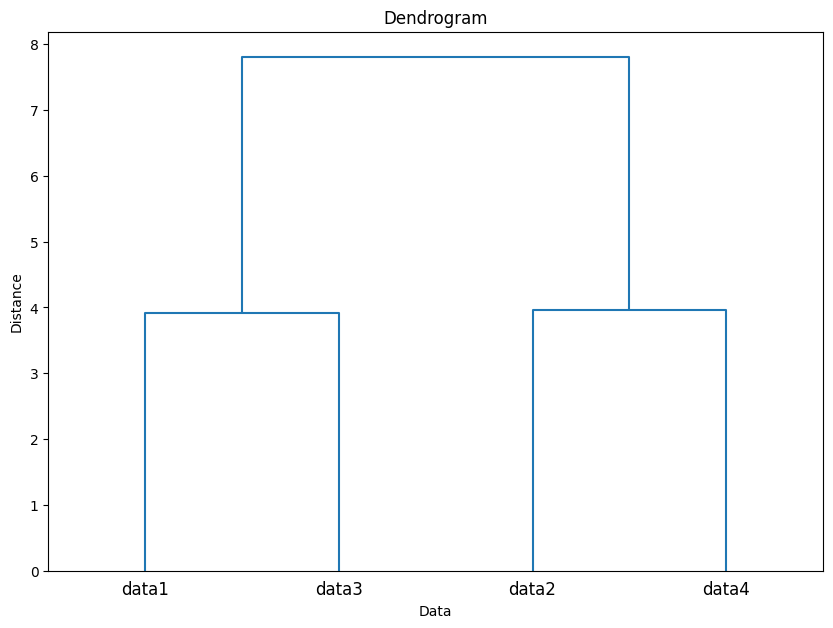

In [ ]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import matplotlib.pyplot as plt

# 距離行列を用いてクラスタリング
# methodの他の例：'single', 'complete', 'ward' など
linkage_matrix = linkage(distance_matrix, method='average')

# 系統樹のプロット
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=distance_df.index, color_threshold=0)
plt.xlabel('Data')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.savefig('dendrogram.png') # 画像に結果を保存
plt.show()